# Sila na vodnik v magnetnem polju
### Gregor Kržmanc, 1. 4. 2021

## 1. UVOD
Na vodnik, ki leži v homogenem magnetnem polju $B$ pravokotno na smer silnic, deluje sila, ki je sorazmerna s tokom $I$ skozi vodnik in dolžino vodnika v polju $l$. $$ F=BIl$$

Magnetni pretok skozi površino S pravokotno na silnice je enak $\phi_m = BS $

## 2. NALOGA
S tehtanjem pokazati, da je sila na vodnik v magnetnem polju podkvastega magneta sorazmerna s tokom. Določiti magnetno polje med koncema magneta in magnetni pretok magneta.

## 3. MERITVE

* dolžina vodnika v magnetnem polju $l = (2.2 \pm 0.2) cm$
* dimenzije ploskve magneta $a = (2 \pm 0.1) cm$, $b = (9 \pm 1) mm$
* napako meritev toka ocenimo na $\pm 1 mA$, napako meritev teže pa na $\pm 0.01 g$

In [9]:
from uncertainties import ufloat
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.constants import g
import pandas as pd
import numpy as np

data = pd.read_csv('data44.dat', sep=' ')
I_err, m_err = 1, 0.01
l, a, b = ufloat(2.2, 0.2) * 1e-2, ufloat(2, 0.1) * 1e-2, ufloat(9, 1) * 1e-3
S = a * b
d = data.copy()
d.columns = ['I [mA]', 'm [g]']

display(d)

,I [mA],m [g]
0,255,0.22
1,352,0.54
2,414,0.37
3,469,0.39
4,425,0.38
5,574,0.51
6,672,0.52
7,1576,1.44
8,1990,1.79
9,2134,1.90


## 4. REZULTATI

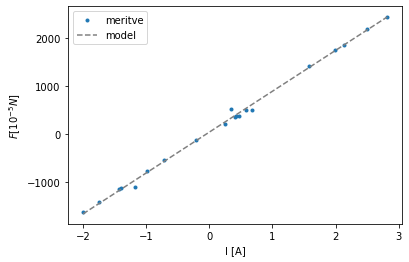

In [10]:
data['I'] = data['I'] * 1e-3
data['m'] = data['m'] * 1e-3
data['F'] = data['m'] * g
multiplier = 1e5
datalen = len(data['I'].values)
func = lambda x, k, n: k * x + n
popt, pcov = curve_fit(func, data['I'].values, data['F'].values)
k = ufloat(popt[0], np.sqrt(np.diag(pcov))[0])
_x = np.linspace(min(data['I'].values), max(data['I'].values), 3)
plt.plot(data['I'].values, data['F'].values * multiplier, ".", label='meritve')
plt.plot(_x, func(_x, popt[0], popt[1]) * multiplier, "--", color="gray", label='model')
plt.errorbar(data['I'].values, data['F'].values * multiplier,
            xerr=[I_err * 1e-3]*datalen, yerr=[m_err * g * 1e-3 * multiplier]*datalen,
            ecolor='black', elinewidth=3, fmt='none')
plt.legend()
plt.xlabel('I [A]')
plt.ylabel(r'$F [10^{-5} N]$')
plt.show()

*Na narisanem grafu so napake v rangu debeline točk meritev.

In [8]:
B = k / l
magflux = B * S
print('B =', B, 'T')
print('Φ_m =', magflux, 'Vs')

B = 0.387+/-0.035 T
Φ_m = (7.0+/-1.1)e-05 Vs
